### Data init

#### imports

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.insert(0, "..") #nuclear_aux, nuclearNetAnalyzer

import nuclearNetAnalyzer as nuc_an
import nuclear_aux as nuc_aux

#### strcuture creation

In [14]:
data_dict = nuc_an.analyzeNetwork('mesa_80', mesa=False, netdir=os.getcwd())

nrows, ncols = 200, 200

minProt = 0; maxProt = 31;
minNeut = 0; maxNeut = 32;

data, elementName, eleLabelPos = nuc_an.getDataStructs(data_dict, 
                                                       periodicTable=pd.read_csv('../sources/periodicTableNames.csv'), 
                                                       fullIsotopeList=pd.read_csv('../sources/nndc_nudat_data_export.csv'), 
                                                       nrows=nrows, ncols=ncols, minProt=minProt, maxProt=maxProt, minNeut=minNeut, maxNeut=maxNeut)

{'neut': [], 'h': [1, 2], 'he': [3, 4], 'li': [7], 'be': [7, 9, 10], 'b': [8], 'c': [12, 13], 'n': [13, 14, 15], 'o': [14, 15, 16, 17, 18], 'f': [17, 18, 19], 'ne': [18, 19, 20, 21, 22], 'na': [21, 22, 23, 24], 'mg': [23, 24, 25, 26], 'al': [25, 26, 27], 'si': [27, 28, 29, 30], 'p': [30, 31], 's': [31, 32, 33, 34], 'cl': [35], 'ar': [35, 36, 37, 38], 'k': [39], 'ca': [39, 40, 41, 42], 'sc': [43], 'ti': [44, 45, 46], 'v': [47], 'cr': [48, 49, 50], 'mn': [51], 'fe': [52, 53, 54, 56], 'co': [55, 56], 'ni': [56, 57, 58, 59], 'cu': [59], 'zn': [60]}


### Plotting part


Text(0.5, 0.98, 'mesa_80')

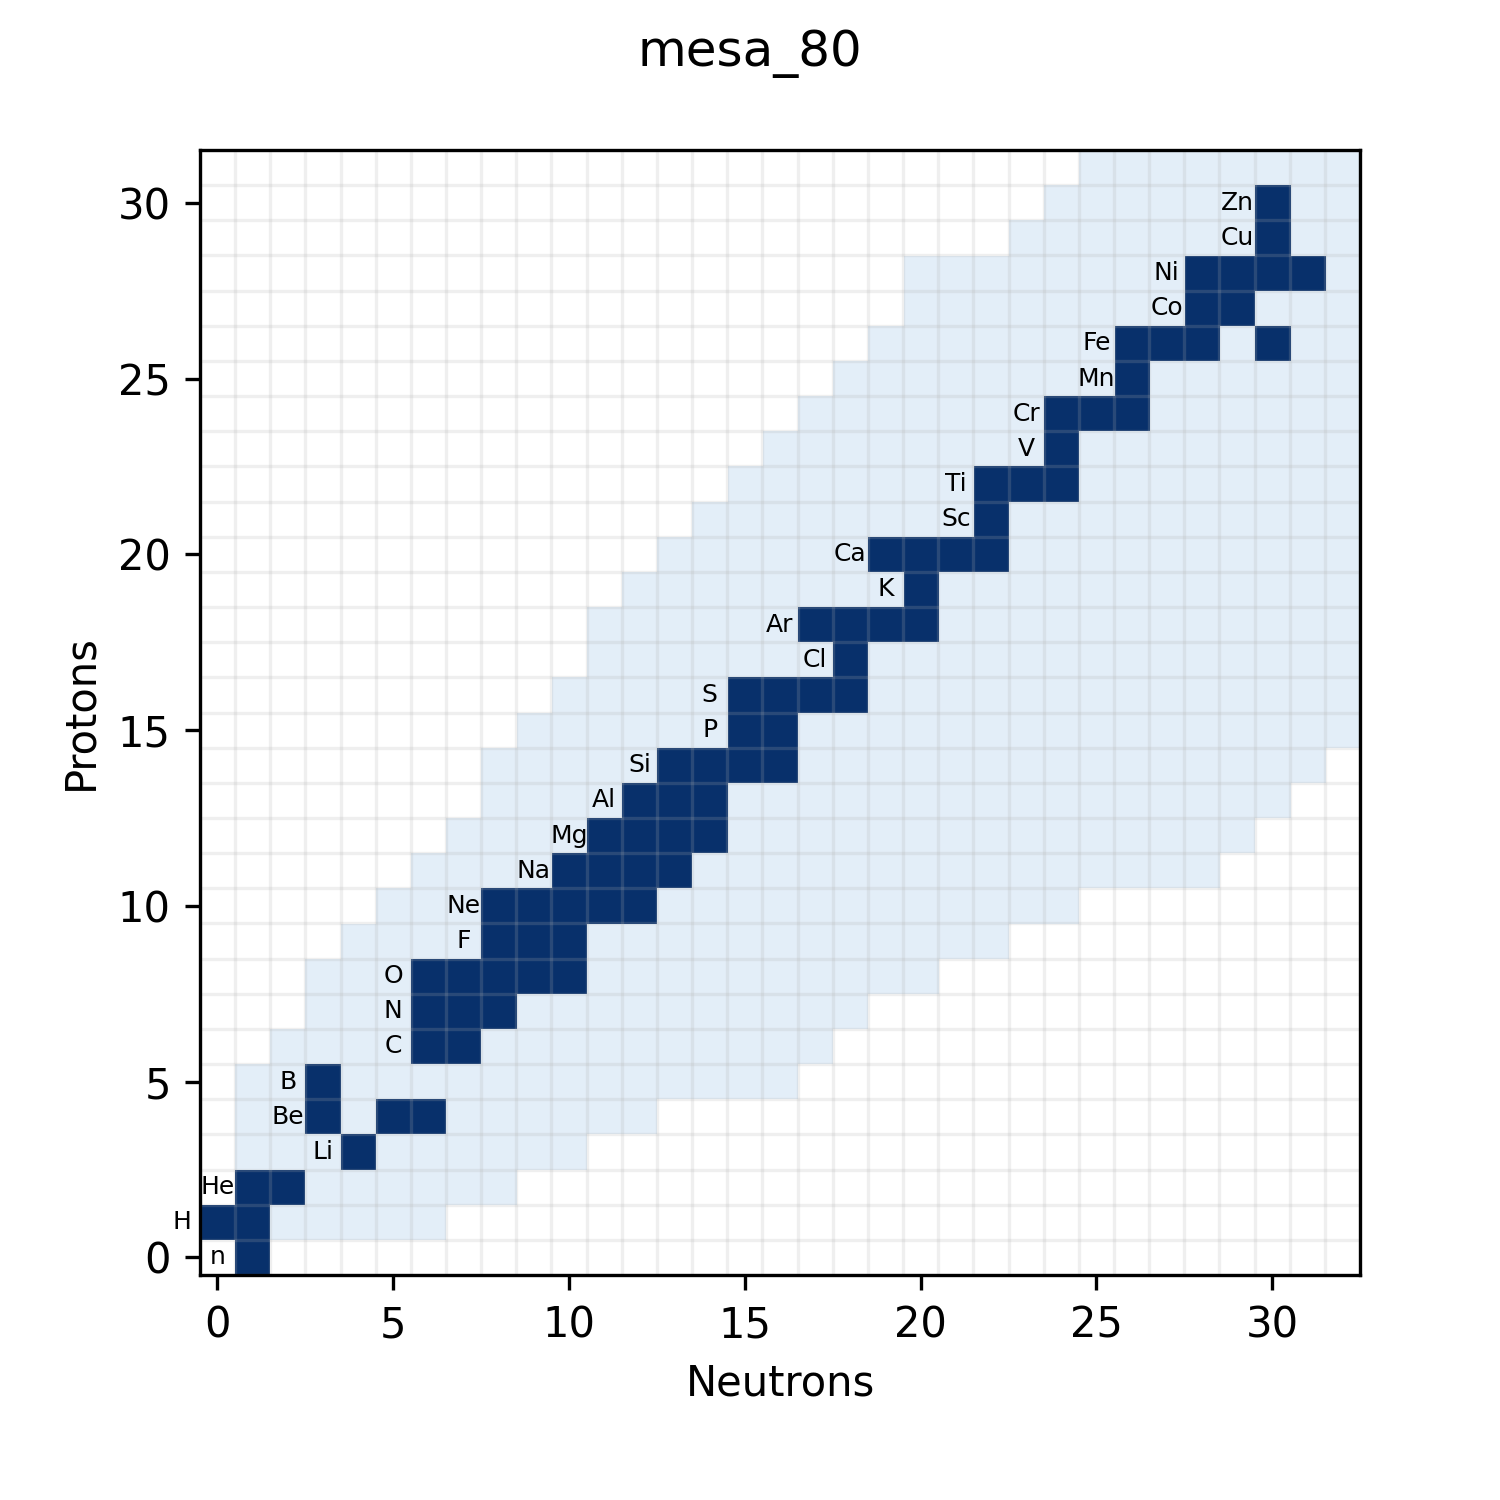

In [12]:

fig = plt.figure(figsize=[5,5], dpi=300)
ax = plt.axes()
font = {'size'   : 10}
plt.rc('font', **font)
fig.subplots_adjust(top=0.9, bottom=0.15, left=0.05, right=0.99)
ax.imshow(data, cmap="Blues", origin="lower", vmin=0)
for j,iso in enumerate(np.array(elementName)):
    ax.text(eleLabelPos[j][1],eleLabelPos[j][0],iso,ha='center',va='center',fontsize=6)
# add grid
ax.set_xticks(np.arange(ncols+1)-0.5, minor=True)
ax.set_yticks(np.arange(nrows+1)-0.5, minor=True)
ax.grid(which="minor", alpha=0.2)
ax.tick_params(which="minor", size=0)
ax.set_xlabel('Neutrons') #N
ax.set_ylabel('Protons') #Z
ax.set_xlim(minNeut-0.5, maxNeut+0.5)
ax.set_ylim(minProt-0.5, maxProt+0.5)
# ax.set_xlim(0-0.5, 180)
# ax.set_ylim(0-0.5, 120)

fig.suptitle(data_dict['network'])

# plt.tight_layout()
# plt.savefig(data_dict['network']+'Network.pdf',format='pdf')